# Problem Statement:Airbnd Hotel Booking Analysis

The hospitality industry has undergone a significant transformatian vith the rise of online platforms facilitating short.term lodging and tourism.Leading this revolution is Airbnb, Inc, a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and
personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission based model, facilitating transactions
between hosts and guests without owning the properties listed on its platform
This research analysis delves into the New York City Airbnb dataset to extract meaningful insights, Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's
operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking
to navigate the evolving landscape of short-term accommodation.




# Questions
1. What are the diferent property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhoods group have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to recieve positive reviews?
7. Is there a cortelation between the price of a listing and its service fee?
8. What is the average review rate number (e.g, stars) forlistings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?




# DATA WRANGLING
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handing missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Read the AirBnb Data
df = pd.read_csv('/content/sample_data/Airbnb_Open_Data.csv', low_memory = False)

# ACCESS THE DATA

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2688 non-null   int64  
 1   NAME                            2632 non-null   object 
 2   host id                         2687 non-null   float64
 3   host_identity_verified          2614 non-null   object 
 4   host name                       2668 non-null   object 
 5   neighbourhood group             2660 non-null   object 
 6   neighbourhood                   2671 non-null   object 
 7   lat                             2679 non-null   float64
 8   long                            2679 non-null   float64
 9   country                         2637 non-null   object 
 10  country code                    2608 non-null   object 
 11  instant_bookable                2608 non-null   object 
 12  cancellation_policy             26

In [ ]:
df.duplicated().value_counts()

,count
False,2688


In [ ]:
# Neighbourhood group was "brookIn’ instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookIn']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


# Problems Identified within the Data
·541 duplicated Records where found in the Data.

· Insufficient information were recorded for the house_rules and Licence columns.

**·** Dollar signs and commas recorded along with the values for price and service fee

 **·** The currency for price and service fee were not added to the column's titles.


**·** Missing values in some records

**·** Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes.

**.** In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.

**·** Some outliers were identified in the availability 365 column.

# CLEAN THE DATA

Steps to be Taken for Data Cleaning

**·**Drop duplicated records

**·** Drop house_rules and license columns with insufficient data.

**.** Remove all dollar signs in the price and service fee columns.

• Remove all commas from the price and service fee columns

• Rename the price and service fee columns to include a dollar signs

**.** Drop all records with missing values.

• Change all mismatched data types to the appropriate once

**·** Correct the Spelling of brookIn' to 'Brooklyni

• Get rid of outliers in the 'availability 365' column data.

In [ ]:
#Drop duplicate records
df.drop_duplicates(inplace = True)
#dr Loading.- rules and license colurns with insufficient data
df.drop(['house_rules', 'license'], axis = 1, inplace = True, errors='ignore')

# Check if columns exist before processing
if 'price' not in df.columns or 'service fee' not in df.columns:
    print("Error: 'price' or 'service fee' column not found in the DataFrame.")
else:
    # Print column names to check for hidden characters
    print("Original columns:", df.columns.tolist())

    # Clean and convert price column
    df['price'] = df['price'].astype(str).str.replace('$','', regex= False)
    df['price'] = df['price'].astype(str).str.replace(',','', regex= False)
    df['price'] = df['price'].astype(float)

    # Clean and convert service fee column
    df['service fee'] = df['service fee'].astype(str).str.replace('$','',regex = False)
    df['service fee'] = df['service fee'].astype(str).str.replace(',','', regex= False)
    df['service fee'] = df['service fee'].astype(float)


    # Rename the price and service fee columns to include a dollar sign
    print("Columns before renaming:", df.columns.tolist())
    df.rename(columns = {
    'price':'price $',
    'service fee':'service_fee_$'
    }, inplace = True)
    print("Columns after renaming:", df.columns.tolist())

    #drop all the records with missing values
    df.dropna(inplace = True)

    #change other mismatched data types to the appropriate once.
    df['id'] = df['id'].astype(str)
    df[ 'host id'] = df['host id'].astype(str)
    df['last review']= pd.to_datetime(df['last review'])
    df['Construction year'] = df['Construction year'].astype(int)

Original columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']
Columns before renaming: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']
Columns after renaming: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'cou

/tmp/ipython-input-2487856834.py:38: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review']= pd.to_datetime(df['last review'])


In [ ]:
df.duplicated().value_counts()

,count
False,2038


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to 2686
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2038 non-null   object        
 1   NAME                            2038 non-null   object        
 2   host id                         2038 non-null   object        
 3   host_identity_verified          2038 non-null   object        
 4   host name                       2038 non-null   object        
 5   neighbourhood group             2038 non-null   object        
 6   neighbourhood                   2038 non-null   object        
 7   lat                             2038 non-null   float64       
 8   long                            2038 non-null   float64       
 9   country                         2038 non-null   object        
 10  country code                    2038 non-null   object        
 11  instant_b

#EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights, In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and
correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

**Summary Statistics**

In [ ]:
df.describe()

,lat,long,Construction year,price $,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.00000,2038.000000,2038,2038.000000,2038.000000,2038.000000,2038.000000
mean,40.727473,-73.962275,2012.376349,608.946026,121.790972,10.43474,67.270854,2018-07-15 07:20:54.170755328,0.893180,2.990186,2.014230,206.171737
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.00000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687703,-73.984960,2007.000000,327.000000,65.000000,2.00000,11.000000,2018-04-22 00:00:00,0.170000,2.000000,1.000000,97.000000
50%,40.721685,-73.962040,2012.000000,608.000000,122.000000,3.00000,35.500000,2019-05-13 00:00:00,0.500000,3.000000,1.000000,206.000000
75%,40.759493,-73.946133,2017.000000,889.250000,177.750000,6.00000,93.000000,2019-06-22 00:00:00,1.240000,4.000000,2.000000,313.000000
max,40.897470,-73.739550,2022.000000,1200.000000,240.000000,452.00000,607.000000,2022-05-21 00:00:00,10.000000,5.000000,52.000000,426.000000
std,0.052080,0.035657,5.775472,333.092584,66.632857,31.67704,82.109308,NaN,1.069607,1.420760,4.231088,124.075238


# What are the different types in the Dataset?

In [ ]:
#what are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,1220
Private room,794
Shared room,24


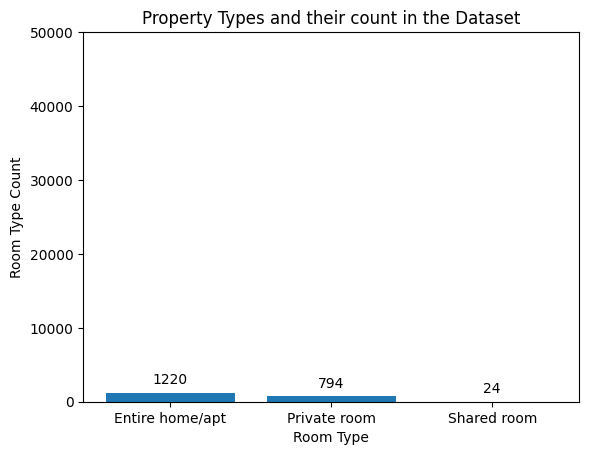

In [ ]:
#room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"] );
plt.bar_label(room_type_bar,labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0, 50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt. title('Property Types and their count in the Dataset');

# Which neighborhood group has the highest number of listings?

In [ ]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,943
Brooklyn,927
Queens,131
Bronx,22
Staten Island,14
brookln,1


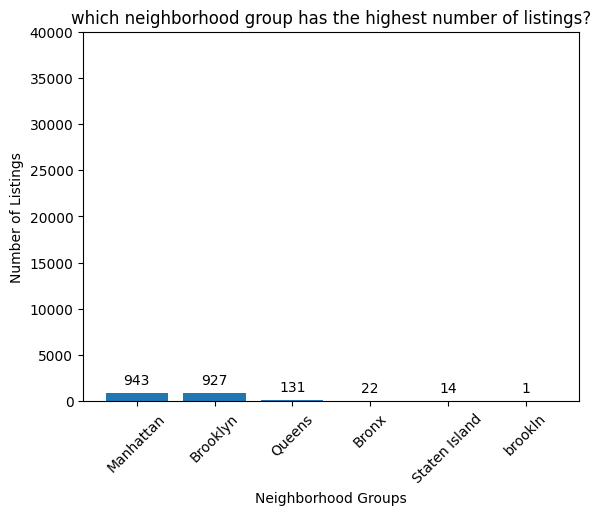

In [ ]:


#which neighborhood group has the highest number of listings?
hood_group = df['neighbourhood group'].value_counts().to_frame() # Add the code to define hood_group
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4 ); # Corrected typo 'pading' to 'padding'
plt.ylim(0, 40000);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('which neighborhood group has the highest number of listings?');

# Which neighborhoods group have the highest average prices for Airbnb listings?

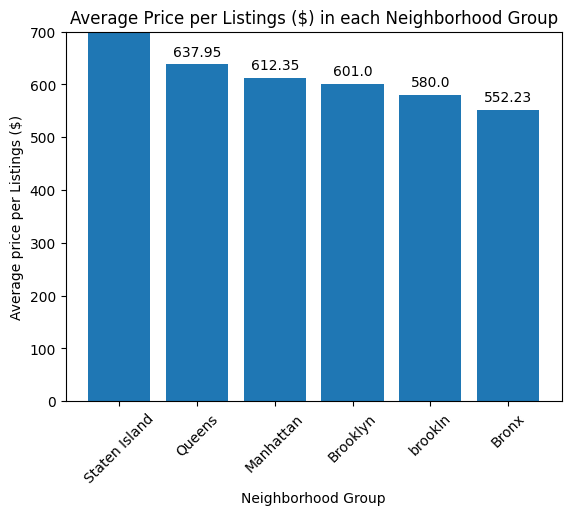

In [ ]:
#which neighborhoods group have the highest average prices for Aironb Listings?
avg_price = df.groupby('neighbourhood group')['price $'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price. loc[:,'price $']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price $"], 2), label_type = 'edge', padding = 4 );
plt.ylim([0, 700]);
plt.xlabel('Neighborhood Group');
plt.ylabel("Average price per Listings ($)");
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

# Is there a relationship between the construction year of property and price?

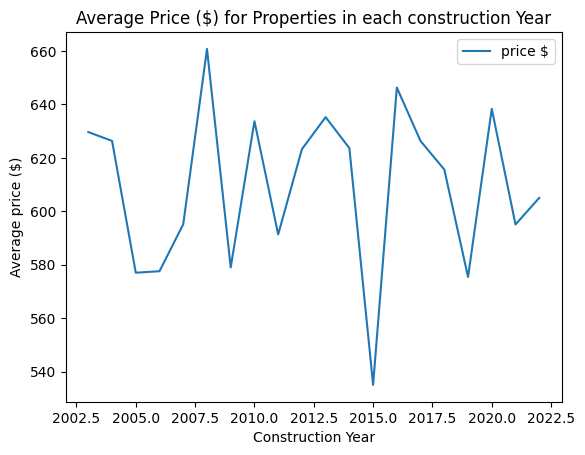

In [ ]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price $'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average price ($)');
plt. title('Average Price ($) for Properties in each construction Year');

# Who are the top 10 hosts by calculated host listing count?

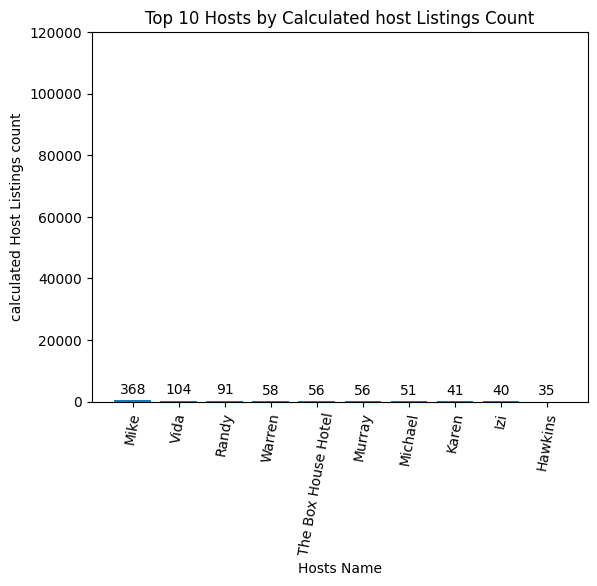

In [ ]:
hosts = df.groupby("host name")['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count' ]);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('calculated Host Listings count');
plt.xticks(rotation = 80);
plt.ylim(0,120000);
plt. title('Top 10 Hosts by Calculated host Listings Count');

# Are hosts with verified identities more likely to receive positive reviews?

In [ ]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby("host_identity_verified")['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.028902
verified,2.950000


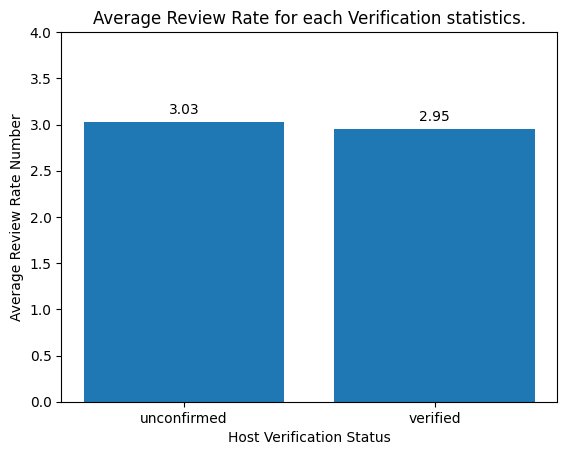

In [ ]:
review_bar = plt.bar(review. index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4 );
plt.ylim([0, 4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification statistics.');

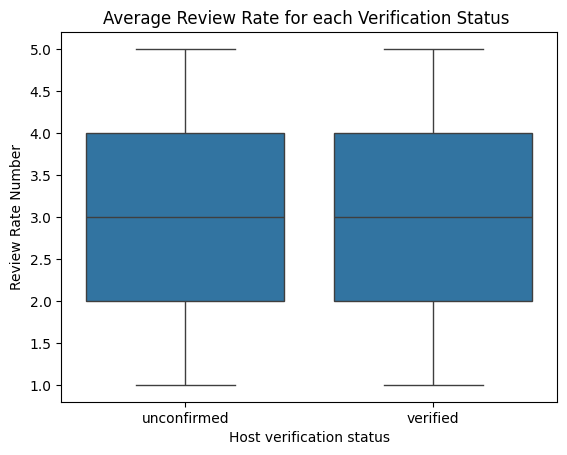

In [ ]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status ');

# Is there a correlation betweeen the price of a listing and its service fee?

In [ ]:
#Is there a correlation between the price of a listing, and its service fee?
df['price $'].corr(df['service_fee_$'])

np.float64(0.9999911363033281)

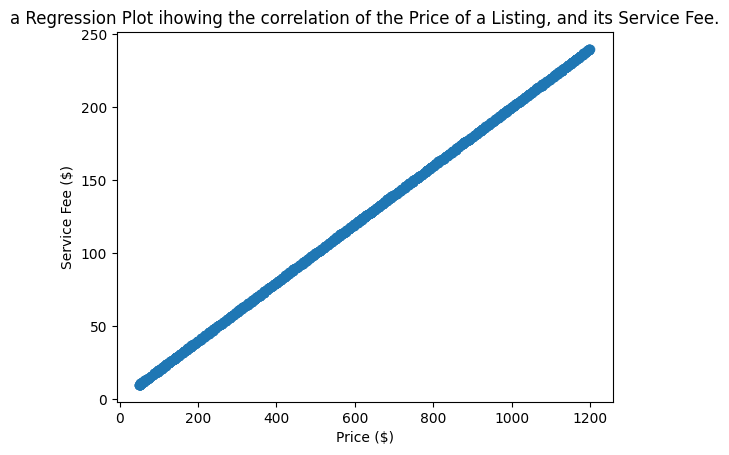

In [ ]:
sns.regplot(df, x ='price $', y ='service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title( "a Regression Plot ihowing the correlation of the Price of a Listing, and its Service Fee.");

# What are the average review rate number(e.g.,stars) for listings, and does it vary based on the neighborhood group and room type?

In [ ]:
avg_review_rate = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
display(avg_review_rate)

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.125000
                    Private room               2.928571
Brooklyn            Entire home/apt            2.962162
                    Private room               3.107735
                    Shared room                2.900000
Manhattan           Entire home/apt            2.983278
                    Private room               2.973134
                    Shared room                2.800000
Queens              Entire home/apt            2.909091
                    Private room               2.916667
                    Shared room                3.250000
Staten Island       Entire home/apt            3.250000
                    Private room               2.200000
brookln             Private room               4.000000

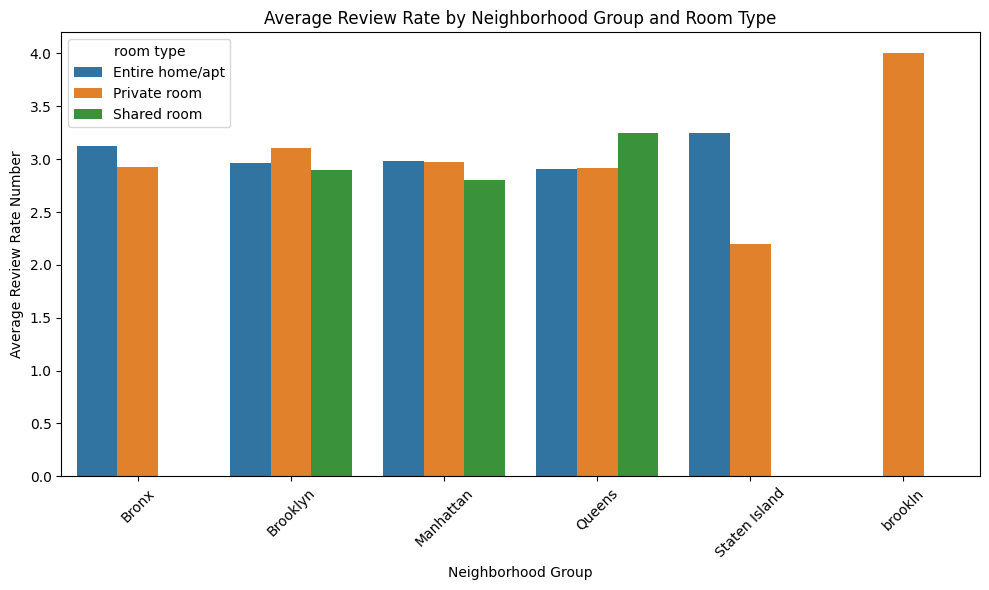

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_review_rate.reset_index(), x='neighbourhood group', y='review rate number', hue='room type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate by Neighborhood Group and Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Are hosts with a higher calculated host listing count more likely to maintain higher availability throughout the year?

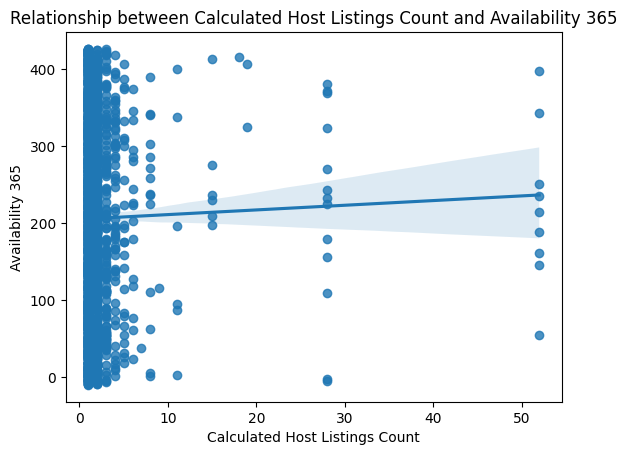

In [ ]:
sns.regplot(data=df, x='calculated host listings count', y='availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('Relationship between Calculated Host Listings Count and Availability 365')
plt.show()

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.020671058337356222)

# Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.
Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.
Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.